In [117]:
import numpy as np
import pandas as pd

In [118]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [119]:
from statsmodels.tsa.stattools import adfuller

In [120]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [121]:
# Считываем поквартальные данные о количестве туристов
# (данные кумулятивные - с начала года до указанной даты):
data = pd.read_csv('foreign_tourists.csv', usecols=['Date', 'Foreign_tourists'])
data.Date = pd.to_datetime(data.Date)

In [122]:
# Преобразуем столбец с датами в индекс:
data = data.set_index(['Date'])

In [123]:
matplotlib inline

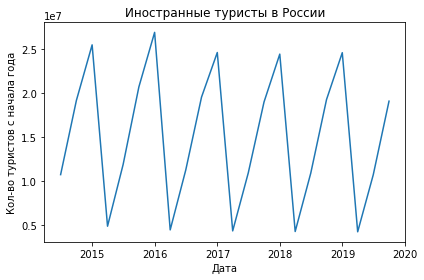

In [124]:
# Выводим график с динамикой туристического потока,
# чтобы визуально убедиться, что данные коррелируют с временными интервалами:
plt.plot(data)
plt.xlabel('Дата')
plt.ylabel('Кол-во туристов с начала года')
plt.title('Иностранные туристы в России')
plt.tight_layout()

In [125]:
# Вычисляем скользящее среднее и стандартное отклонение
# для окна в 4 элемента Time Series (4 квартала):
rolmean = data.rolling(window=4).mean()
rolstd = data.rolling(window=4).std()

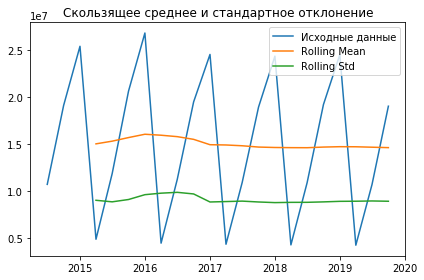

In [126]:
# Выводим график со статистическими показателями:
plt.plot(data, label='Исходные данные')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.legend()
plt.title('Скользящее среднее и стандартное отклонение')
plt.tight_layout()

In [127]:
# Dickey-Fuller test:
print('Результат Dickey-Fuller test:')
dftest = adfuller(data['Foreign_tourists'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test_statistic', 'p-value', 'Lags_used', 'Number_of_observations'])
for key, value in dftest[4].items():
    dfoutput['Critical_value(%s)' % key] = value
print(dfoutput)

Результат Dickey-Fuller test:
Test_statistic            -4.664990
p-value                    0.000098
Lags_used                  9.000000
Number_of_observations    12.000000
Critical_value(1%)        -4.137829
Critical_value(5%)        -3.154972
Critical_value(10%)       -2.714477
dtype: float64


Text(0.5, 1.0, 'Логарифм ряда исходных данных')

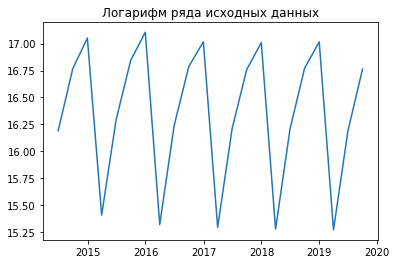

In [128]:
# Визуально оцениваем тренд для логарифма исходных данных:
data_logScale = np.log(data)
plt.plot(data_logScale)
plt.title('Логарифм ряда исходных данных')

Text(0.5, 1.0, 'Скользящее среднее и станд. отклонение для логарифма данных')

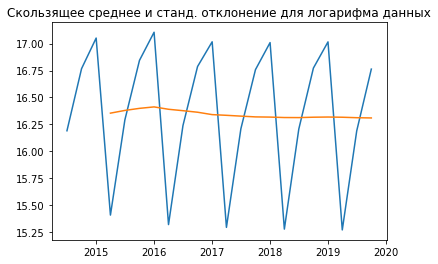

In [129]:
movingAverage = data_logScale.rolling(window=4).mean()
movingStd = data_logScale.rolling(window=4).std()
plt.plot(data_logScale, label='Лог. данных')
plt.plot(movingAverage, label='Rolling Mean')
plt.title('Скользящее среднее и станд. отклонение для логарифма данных')

In [130]:
dataLogScaleMinusMovingAverage = data_logScale - movingAverage
print(dataLogScaleMinusMovingAverage)

            Foreign_tourists
Date                        
2014-06-30               NaN
2014-09-30               NaN
2014-12-31               NaN
2015-03-31         -0.947322
2015-06-30         -0.087959
2015-09-30          0.445762
2015-12-31          0.693805
2016-03-31         -1.071489
2016-06-30         -0.138139
2016-09-30          0.424656
2016-12-31          0.676696
2017-03-31         -1.041352
2017-06-30         -0.117769
2017-09-30          0.439333
2017-12-31          0.692369
2018-03-31         -1.036924
2018-06-30         -0.106508
2018-09-30          0.456530
2018-12-31          0.698373
2019-03-31         -1.047157
2019-06-30         -0.122764
2019-09-30          0.453985


In [131]:
# Удаляем строки с отсутствующими данными:
dataLogScaleMinusMovingAverage.dropna(inplace=True)
print(dataLogScaleMinusMovingAverage)

            Foreign_tourists
Date                        
2015-03-31         -0.947322
2015-06-30         -0.087959
2015-09-30          0.445762
2015-12-31          0.693805
2016-03-31         -1.071489
2016-06-30         -0.138139
2016-09-30          0.424656
2016-12-31          0.676696
2017-03-31         -1.041352
2017-06-30         -0.117769
2017-09-30          0.439333
2017-12-31          0.692369
2018-03-31         -1.036924
2018-06-30         -0.106508
2018-09-30          0.456530
2018-12-31          0.698373
2019-03-31         -1.047157
2019-06-30         -0.122764
2019-09-30          0.453985


In [132]:
def test_stationary(timeseries):
    """Функция принимает объект Time Series, вычисляет показатели
    скользящего среднего и стандартного отклонения и выводит график,
    выполняет Dickey-Fuller test и выводит его показатели."""

    # Вычисляем показатели:
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()

    # Выводим график:
    plt.plot(timeseries, label='Original')
    plt.plot(movingAverage, label='Rolling Mean')
    plt.plot(movingSTD, label='Rolling Std')
    plt.legend()
    plt.title('Скользящее среднее и стандартное отклонение')
    plt.tight_layout()

    # Dickey-Fuller test:
    print('Результат Dickey-Fuller test:')
    dftest = adfuller(timeseries['Foreign_tourists'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_statistic', 'p-value', 'Lags_used', 'Number_of_observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical_value(%s)' % key] = value
    print(dfoutput)

Результат Dickey-Fuller test:
Test_statistic            -2.928784
p-value                    0.042102
Lags_used                  3.000000
Number_of_observations    15.000000
Critical_value(1%)        -3.964443
Critical_value(5%)        -3.084908
Critical_value(10%)       -2.681814
dtype: float64


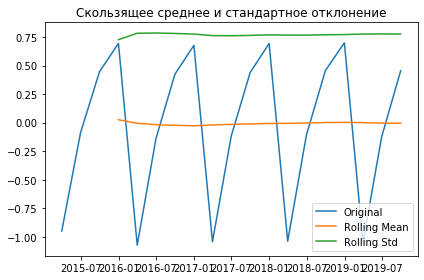

In [133]:
# Вызываем функцию:
test_stationary(dataLogScaleMinusMovingAverage)

Text(0.5, 1.0, 'Средневзвешенный показатель для логарифма данных')

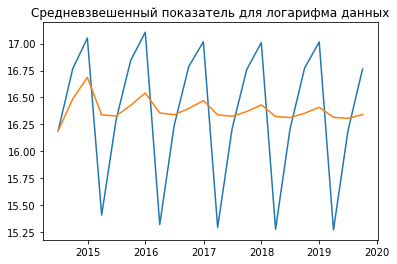

In [134]:
# Средневзвешенный показатель:
exponentialDecayWeightedAverage = data_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_logScale)
plt.plot(exponentialDecayWeightedAverage)
plt.title('Средневзвешенный показатель для логарифма данных')

Результат Dickey-Fuller test:
Test_statistic           -9.834869e+00
p-value                   4.925923e-17
Lags_used                 9.000000e+00
Number_of_observations    1.200000e+01
Critical_value(1%)       -4.137829e+00
Critical_value(5%)       -3.154972e+00
Critical_value(10%)      -2.714477e+00
dtype: float64


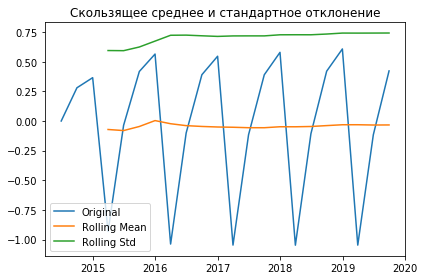

In [135]:
datasetLogScaleMinusMovingExponentialDecayAverage = data_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

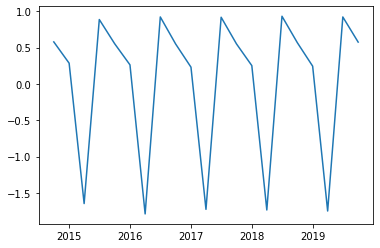

In [136]:
# Сдвигаем данные:
datasetLogDiffShifting = data_logScale - data_logScale.shift()
plt.plot(datasetLogDiffShifting)

Результат Dickey-Fuller test:
Test_statistic            -1.757370
p-value                    0.401822
Lags_used                  8.000000
Number_of_observations    12.000000
Critical_value(1%)        -4.137829
Critical_value(5%)        -3.154972
Critical_value(10%)       -2.714477
dtype: float64


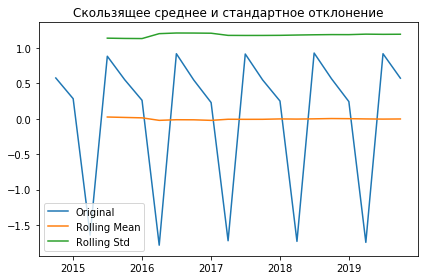

In [137]:
# Удаляем отсутствующие значения:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [138]:
# Компоненты Time Series:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logScale)

In [139]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

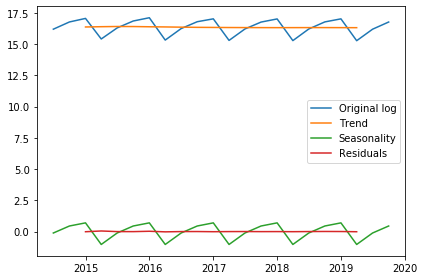

In [140]:
plt.plot(data_logScale, label='Original log')
plt.plot(trend, label='Trend')
plt.plot(seasonal, label='Seasonality')
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()

Результат Dickey-Fuller test:
Test_statistic            -2.895765
p-value                    0.045843
Lags_used                  6.000000
Number_of_observations    11.000000
Critical_value(1%)        -4.223238
Critical_value(5%)        -3.189369
Critical_value(10%)       -2.729839
dtype: float64


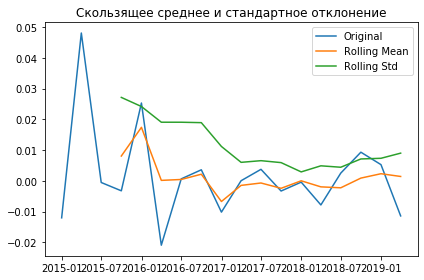

In [141]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

In [142]:
from statsmodels.tsa.stattools import acf, pacf

In [143]:
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

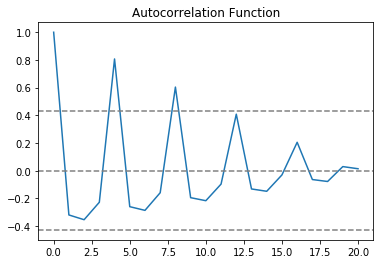

In [144]:
# Выводим график ACF:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

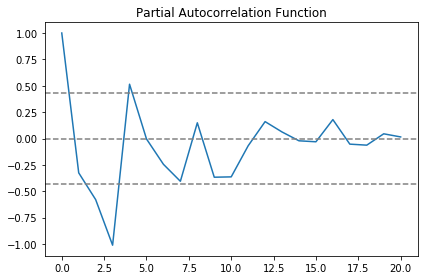

In [145]:
# Выводим график PACF:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [146]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


Plotting AR Model


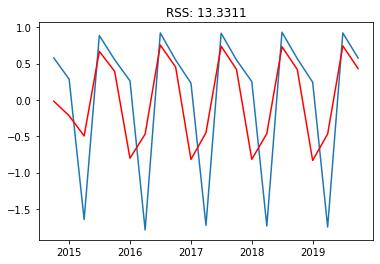

In [147]:
# AR Model:
model = ARIMA(data_logScale, order=(2, 1, 0))  # (P, Q, d) values
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['Foreign_tourists']) ** 2))
# RSS - Residual Sum of Squares (чем ниже этот показатель - тем лучше)
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


Plotting MA Model


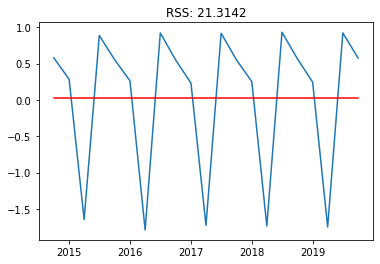

In [148]:
# MA Model:
model = ARIMA(data_logScale, order=(0, 1, 0))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - datasetLogDiffShifting['Foreign_tourists']) ** 2))
print('Plotting MA Model')

In [149]:
# ARIMA Model:
model = ARIMA(data_logScale, order=(2, 1, 0))
results_ARIMA = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [150]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
prediction_ARIMA_diff.head()

Date
2014-09-30   -0.017256
2014-12-31   -0.218095
2015-03-31   -0.495491
2015-06-30    0.667069
2015-09-30    0.393011
dtype: float64

In [151]:
# Нарастающим итогом:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_diff_cumsum.head()

Date
2014-09-30   -0.017256
2014-12-31   -0.235351
2015-03-31   -0.730842
2015-06-30   -0.063773
2015-09-30    0.329238
dtype: float64

In [152]:
# Делаем прогноз:
prediction_ARIMA_log = pd.Series(data_logScale['Foreign_tourists'].iloc[0], index=data_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
print(prediction_ARIMA_log.head())

Date
2014-06-30    16.190278
2014-09-30    16.173021
2014-12-31    15.954926
2015-03-31    15.459435
2015-06-30    16.126505
dtype: float64


,Foreign_tourists
Date,
2014-06-30,16.190278
2014-09-30,16.767355
2014-12-31,17.051750
2015-03-31,15.406698
2015-06-30,16.291322
2015-09-30,16.844273
2015-12-31,17.105838
2016-03-31,15.318492
2016-06-30,16.238683


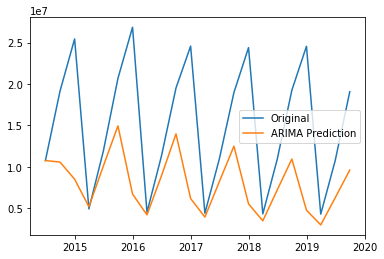

In [153]:
# Возвращаем данные в исходный масштаб:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(data, label='Original')
plt.plot(prediction_ARIMA, label='ARIMA Prediction')
plt.legend()
data_logScale

(array([15.93150499, 16.01852062, 16.38722113, 16.11269975, 16.02077257,
        16.18142536, 16.11191368, 16.02570769, 16.0725846 , 16.05920726,
        16.00527067, 16.00501178]),
 array([0.79058854, 0.87675857, 0.89233509, 1.02253762, 1.11356197,
        1.15100527, 1.21875761, 1.29061259, 1.33801442, 1.3902062 ,
        1.44754738, 1.49575121]),
 array([[14.38197992, 17.48103006],
        [14.30010539, 17.73693584],
        [14.63827648, 18.13616577],
        [14.10856284, 18.11683666],
        [13.8382312 , 18.20331393],
        [13.92549648, 18.43735424],
        [13.72319266, 18.50063469],
        [13.49615349, 18.55526189],
        [13.45012452, 18.69504468],
        [13.33445319, 18.78396134],
        [13.16812994, 18.84241139],
        [13.07339329, 18.93663028]]))

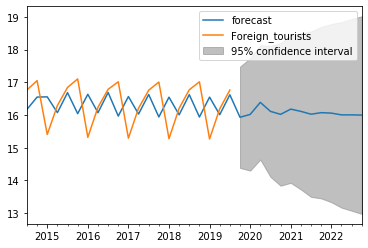

In [154]:
# Делаем прогноз на 3 года:
results_ARIMA.plot_predict(1, 34)
results_ARIMA.forecast(steps=12)